# Class 1 Warm-up on Sims lecture
Words in bold are commands to be typed in the Anaconda prompt.
## Setting up the class environment

1. Install [Anaconda](https://www.anaconda.com/). 
   - To check the conda version: **conda list anaconda$**
2. Create you work environment to be able to reproduce your work
   - to check the environments you have: **conda env list**
   - to create the Class environment: **conda create --name ClassEM python=3.6 notebook numpy pandas matplotlib xlrd statsmodels pandas_datareader**
   - to activate the environment: **conda activate ClassEM**
   - to deactivate the environment: **conda deactivate**
   - to list packages in your environment: **conda list -n ClassEM**
   - to export your packages in a list: **conda list --export > package-list.txt**
   - to create an environment with your packages: **conda create -n myenv --file package-list.txt**   


## Markdown in notebooks
Markdown allows you to enhance your code and make it very readable
> Haavelmo Statistical Testing of Business-Cycle Theories
The modified Haavelmo Model (Sims Nobel Lecture) is:
$$C_t = \beta + {\alpha}Y_t+\epsilon_t$$
$$I_t = \theta_0 + \theta_1(C_t - C_{t-1}) + \eta_t$$
$$Y_t = C_t + I_t + G_t$$
$$G_t = \gamma_0 + \gamma_1G_{t-1} + v_t$$
Substituting for $Y_t$ the system is therefore
\begin{equation}
C_{t}\left(1-\alpha\right)-{\alpha}I_t -{\alpha}G_t = \beta + \epsilon_t
\end{equation}
\begin{equation}
-\theta C_{t}+I_{t}=\theta_0 -\theta C_{t-1}+\eta_{t}
\end{equation}
\begin{equation}
G_t = \gamma_0 + \gamma_1G_{t-1} + v_t
\end{equation}
or in matrix terms
$${\Gamma_0}X_t = C + {\Gamma_1}X_{t-1} + U_t$$
where
$$\Gamma_0=\begin{pmatrix}
1-\alpha&-\alpha&-\alpha\\
-\theta&1&0\\
0&0&1
\end{pmatrix}$$
$$C=\begin{pmatrix}
\beta\\
\theta_0\\
\gamma_0
\end{pmatrix}$$
The reduced form is
$$X_{t}=\Gamma_{0}^{-1}C+\Gamma_{0}^{-1}\Gamma_{1}X_{t-1}+\Gamma_{0}^{-1}U_{t}$$
$$X_{t}=A+BX_{t-1}+V_{t}$$


In [17]:
# Import required packages
import numpy as np                                       #import package for data array manipulation
import pandas as pd                                      #import package for data analysis         
from scipy.optimize import minimize                      #import package for scientific computing
import matplotlib.pyplot as plt                          #import package for plotting
pd.core.common.is_list_like = pd.api.types.is_list_like  # to use DataReader with new version of Pandas
from pandas_datareader.data import DataReader            # DataReader allows to download data from the main online
                                                         # repositories : Eurostat, FRED, OECD, ..

In [18]:
# Let us directly download data from the FRED repository
start = '1929' #start date                                             
end   = '1943' #end date
#Data from FRED
cons = DataReader('PCECCA', 'fred', start=start, end=end)
inv  = DataReader('GPDICA', 'fred', start=start, end=end)
gov  = DataReader('GCECA', 'fred',  start=start, end=end)

### Pandas

In [19]:
# create a panda frame
# Pandas is the module you use for data manipulation
haavelmo_data = pd.concat((cons, inv, gov), axis=1)
haavelmo_data.columns = ['c', 'i', 'g']
haavelmo_data['y'] = haavelmo_data['c'] + haavelmo_data['g'] + haavelmo_data['i']

In [23]:
# of course you can read from files, csv are prefererd but almost any format is readable
# you need xlrd module for excel files 
df = pd.read_excel('C:\\Users\\ffranco\\Dropbox\\Work\\Teaching\\Empirical\\2019\\Class1\\Data\\Sims.xls')

In [24]:
# Check the data with the method .info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 5 columns):
date      87 non-null datetime64[ns]
PCECCA    87 non-null float64
GPDICA    87 non-null float64
GCECA     87 non-null float64
Y         87 non-null float64
dtypes: datetime64[ns](1), float64(4)
memory usage: 3.5 KB


In [27]:
# Summary Statistics
df.describe().T

count         mean          std    min      25%     50%     75%  \
PCECCA   87.0  4144.621839  3248.228414  637.6  1371.10  3198.7  6219.7   
GPDICA   87.0   960.949425   859.241262   20.2   273.65   645.5  1422.7   
GCECA    87.0  1548.610345   884.163143  165.7   931.40  1488.0  2254.2   
Y        87.0  6654.181609  4938.393472  842.9  2694.65  5341.1  9886.8   

            max  
PCECCA  11213.3  
GPDICA   2851.9  
GCECA    3091.4  
Y       16924.1

In [28]:
# check the first 5 rows with method .head(). NOTICE indexing starts with 0 !
df.head()

date  PCECCA  GPDICA  GCECA       Y
0 1929-01-01   781.0   123.6  165.7  1070.3
1 1930-01-01   739.1    84.2  182.5  1005.8
2 1931-01-01   716.1    54.7  190.1   960.9
3 1932-01-01   651.9    20.2  184.2   856.3
4 1933-01-01   637.6    27.3  178.0   842.9

In [30]:
# Selecting a column or a row : there are many ways to select a comun let us converge on one
# a column with the column name
# let us reduce the data set to the first 5 rows
df5 = df.head().copy()

In [31]:
# select a column with the name
df5['PCECCA']

0    781.0
1    739.1
2    716.1
3    651.9
4    637.6
Name: PCECCA, dtype: float64

In [32]:
# Purely integer-location based indexing for selection by position .iloc 
# nice but you need to know the location
df5.iloc[1:3,0:5]

date  PCECCA  GPDICA  GCECA       Y
1 1930-01-01   739.1    84.2  182.5  1005.8
2 1931-01-01   716.1    54.7  190.1   960.9

In [37]:
# Purely label-location based indexer for selection by label .loc
# can build very complex queries in your table
df5.loc[(df5['date']>='1930-01-01') & (df5['date']<='1932-01-01'),['GPDICA','Y']]

GPDICA       Y
1    84.2  1005.8
2    54.7   960.9
3    20.2   856.3

### Operators
we have used a logical operator in the above selection
- $|$ :or
- & :and
- $>$ :gt
- $<$ :lt
- $>=$ :ge
- $<=$ :le
- $==$ :eq
- $!=$ :ne

In [38]:
# print the name of the columns
df.columns

Index(['date', 'PCECCA', 'GPDICA', 'GCECA', 'Y'], dtype='object')

In [39]:
# rename a column, attention to inplace
df.rename(columns={'Y': 'GDP'},inplace=True)

### Built-in function

In [40]:
df['GDP'].sum()

578913.7999999999

In [41]:
# an example of many ways of doing things
sum(df['GDP'])

578913.7999999999

In [42]:
%timeit -n 100 df['GDP'].sum()

88.4 µs ± 5.79 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [44]:
%timeit -n 100 sum(df['GDP'])

17.5 µs ± 301 ns per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [45]:
# if speed is really an issue, namely BIG dataset, then transforming into numpy arrays
import numpy as np
GDP = np.array(df['GDP'])
%timeit -n 100 np.sum(GDP)

2.69 µs ± 107 ns per loop (mean ± std. dev. of 7 runs, 100 loops each)


### MATPLOTLIB

In [ ]:
# Plot
plt.figure(figsize=(8,3))
plt.plot(haavelmo_data)
plt.xlabel('Date')
plt.ylabel('Billion Chained Dollar')
plt.title('Haavelmo data')
plt.legend(haavelmo_data.columns)
plt.grid()
plt.show()

# Note that you can use haavelmo_data.plot()

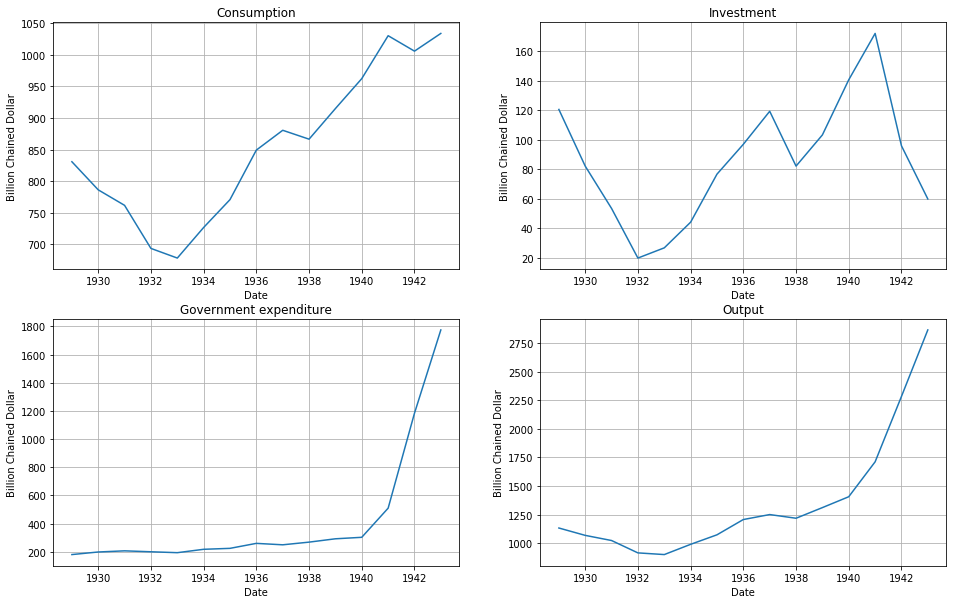

In [5]:
# Plot data
plt.figure(figsize=(16,10))
plt.subplot(221)
plt.plot(haavelmo_data.c)
plt.xlabel('Date')
plt.ylabel('Billion Chained Dollar')
plt.title('Consumption')
plt.grid()
plt.subplot(222)
plt.plot(haavelmo_data.i)
plt.xlabel('Date')
plt.ylabel('Billion Chained Dollar')
plt.title('Investment')
plt.grid()
plt.subplot(223)
plt.plot(haavelmo_data.g)
plt.xlabel('Date')
plt.ylabel('Billion Chained Dollar')
plt.title('Government expenditure')
plt.grid()
plt.subplot(224)
plt.plot(haavelmo_data.y)
plt.xlabel('Date')
plt.ylabel('Billion Chained Dollar')
plt.title('Output')
plt.grid()
plt.show()


In [6]:
# We define Haavelmo as a base class that is why there is object in the parenthesis
# The __init__ function is a special method that is run whenever an
# object is created. `self` is a variable which refers to the object instance
# itself.
class Haavelmo(object):
    
    def __init__(self,k_params,k_variables, params=None):
        
        # Model dimensions
        self.k_params = k_params
        self.k_variables = k_variables
        
        # Initialize parameters
        if params is not None:
            self.update(params)
            
    def update(self, params):
        
        # update the parameter values during estimation  
        self.alpha = params[0]
        self.beta = params[1]
        self.theta1 = params[2]
        self.theta0 = params[3]
        self.gamma1 = params[4]
        self.gamma0 = params[5]
        self.eps_std = params[6]
        self.eta_std = params[7]
        self.v_std = params[8]    
        
    def Gamma_0(self):
        Gamma0 = np.array([
            [1-self.alpha, -self.alpha, -self.alpha],
            [-self.theta1, 1, 0],
            [0, 0, 1],
        ])    
        return Gamma0
    
    def C_(self):
        C = np.array([
            [self.beta],
            [self.theta0],
            [self.gamma0],
        ])        
        return C

    def Gamma_1(self):
        Gamma1 = np.array([
             [0, 0, 0],
            [-self.theta1, 0, 0],
            [0, 0, self.gamma1],
        ])       
        return Gamma1
    
    def VV_(self):
        VV = np.array([
            [self.eps_std**2, 0, 0],
            [0, self.eta_std**2, 0],
            [0, 0, self.v_std**2],
        ])
        return VV

In [7]:
def neg_loglike(theta,endog,exog):
    
    params = theta
    mod = Haavelmo(9,6,params)
    Xhat = mod.Gamma_0()@endog
    U = Xhat - mod.C_() - mod.Gamma_1()@exog
    T = U.shape[1]
    n = U.shape[0]
    temp = np.zeros(T-1)
    for t in range(0,T-1):
        temp[t] = U[:,t].transpose()@np.linalg.inv(mod.VV_())@U[:,t]
        
    #log likelihhod    
    ll = -T*n/2*np.log(2*np.pi) + T/2*np.log(np.linalg.det(mod.Gamma_0())) -0.5*temp.sum() - T/2*np.log(np.linalg.det(mod.VV_()))
    
    #penalization if unconstrained minimization                     
    ll = ll - 1000*min(0,1 -params[0]*(1+params[2]))**2 - 1000*min(0,params[2])**2  - 1000*min(0,params[6])**2  - 1000*min(0,params[7])**2  - 1000*min(0,params[8])**2 
    
    return -ll

In [8]:
# Prepare the data X and X(-1)
endog = []      
endog.append(np.array(haavelmo_data['c']))
endog.append(np.array(haavelmo_data['i']))
endog.append(np.array(haavelmo_data['g']))
endog = np.array(endog)
endog = endog[:,1:] # drop first observation because of one lag
exog = []      
exog.append(np.array(haavelmo_data['c'].shift(1)))
exog.append(np.array(haavelmo_data['i'].shift(1)))
exog.append(np.array(haavelmo_data['g'].shift(1)))
exog = np.array(exog)
exog = exog[:,1:]   # drop first observation because of one lag

In [9]:
# Prepare the data X and X(-1)

haavelmo_data['lc'] = np.log(haavelmo_data['c'])
haavelmo_data['li'] = np.log(haavelmo_data['i'])
haavelmo_data['lg'] = np.log(haavelmo_data['g'])

haavelmo_data['dlc'] = haavelmo_data['lc'] - haavelmo_data['lc'].shift(1)
haavelmo_data['dli'] = haavelmo_data['li'] - haavelmo_data['li'].shift(1)
haavelmo_data['dlg'] = haavelmo_data['lg'] - haavelmo_data['lg'].shift(1)

endog = []      
endog.append(np.array(haavelmo_data['dlc']))
endog.append(np.array(haavelmo_data['dli']))
endog.append(np.array(haavelmo_data['dlg']))
endog = np.array(endog)
endog = endog[:,2:] # drop first 2 observations because of one lag
exog = []      
exog.append(np.array(haavelmo_data['dlc'].shift(1)))
exog.append(np.array(haavelmo_data['dli'].shift(1)))
exog.append(np.array(haavelmo_data['dlg'].shift(1)))
exog = np.array(exog)
exog = exog[:,2:]   # drop first 2 observations because of one lag

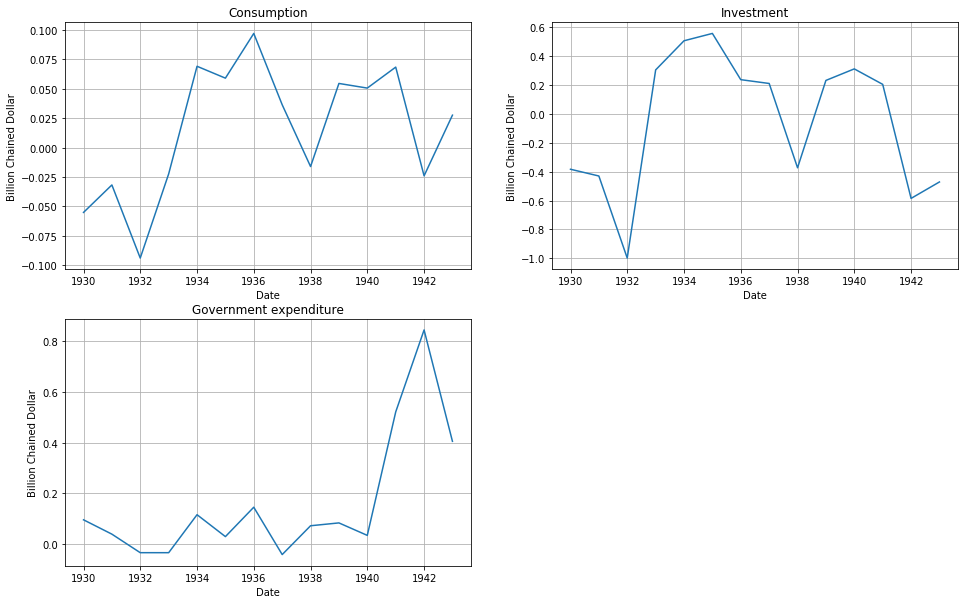

In [10]:
# Plot data
plt.figure(figsize=(16,10))
plt.subplot(221)
plt.plot(haavelmo_data.dlc)
plt.xlabel('Date')
plt.ylabel('Billion Chained Dollar')
plt.title('Consumption')
plt.grid()
plt.subplot(222)
plt.plot(haavelmo_data.dli)
plt.xlabel('Date')
plt.ylabel('Billion Chained Dollar')
plt.title('Investment')
plt.grid()
plt.subplot(223)
plt.plot(haavelmo_data.dlg)
plt.xlabel('Date')
plt.ylabel('Billion Chained Dollar')
plt.title('Government expenditure')
plt.grid()
plt.show()

In [11]:
# Minimization of -LogLikelihood, constrained
# initial guesses

#                       alpha  beta  theta1 theta0 gamma1 gamma0 eps_std eta_std v_std        
theta_start = np.array([ 0.05, 0.5,  0.05,   0.5,  0.991,   0.2,     0.1,   .1,     .1])

# constraints
cons = ({'type': 'ineq', 'fun': lambda x:  1 - x[0]*(1+x[2])},
        {'type': 'ineq', 'fun': lambda x:   1 - x[2]})

# Nelder-Mead, BFGS, 
res = minimize(neg_loglike, theta_start,args=(endog,exog),method="BFGS",options={'disp': True,'maxiter':10000})

Optimization terminated successfully.
         Current function value: -26.080491
         Iterations: 68
         Function evaluations: 891
         Gradient evaluations: 81


In [12]:
res.x

array([0.08468898, 0.00510311, 2.31167707, 0.00693372, 1.26677996,
       0.03907352, 0.02498621, 0.38000509, 0.1702344 ])

A nice and common way to highlight the differences is to compare the confidence interval
of frequentists with the corresponding notion in Bayesian statistics, credible interval.
Confidence interval is from the frequentist's approach, where the parameter is fixed. The
confidence interval is based on the repetition of the observations. A 98% confidence interval
means that repeating the experiment to measure the parameter a large number of times and
calculating the interval for each experiment, 98% of the intervals will contain the value of
the parameter. This goes back to the fact that the data is random.
Credible (or probability) interval stems from probabilities, that is, the Bayesian approach.
This means that the parameter is random and we can say that, given the data, there is a 98%
chance that the true value of the parameter is in the interval

Markov chain Monte Carlo (MCMC) methods
In Bayesian statistics the parameters are not constant but rando variables with a distribution. We are now looking for
$$\pi(\psi|X_T)\propto f_{X_T}(X_T|\psi)\pi(\psi)$$
where the first term on the RHS is the likelihood and the second the prior distribution of the parameters.The LHS is the posterior distribution and is the quantity of interest. MCMC methods allow to sample from ths posterior distribution.
One of the most simple algorithm to implement a MCMC is the Metropolis-Hastings algorithm. The idea is to construct a Markov chain for $\psi$
1. Given the current value of $\psi_{s-1}$, propose a new value $\psi^*$ selected from a proposal $q(\psi;\psi_{s-1})$
2. With probability $\alpha(\psi_{s-1},\psi^*)$ the proposed value is accepted if not the chain remains in place
now $$\alpha(\psi_{s-1},\psi^*) = min\Big({\frac{\pi(\psi^*|X_T)q(\psi^*;\psi_{s-1})}{\pi(\psi_{s-1}|X_T)q(\psi_{s-1};\psi^*)}},1\Big)$$
 $$\alpha(\psi_{s-1},\psi^*) = min\Big({\frac{f_{X_T}(X_T|\psi^*)\pi(\psi^*)q(\psi^*;\psi_{s-1})}{f_{X_T}(X_T|\psi_{s-1})\pi(\psi_{s-1})q(\psi_{s-1};\psi_{s-1}^*)}},1\Big)$$
 and using a proposal distribution that satistifes $q(\psi_{s-1};\psi_{s-1}^*)=q(\psi^*;\psi_{s-1})$. Which we can compute from the Likelihood and the prior.
A convienent choice is $$\psi^*=\psi_{s-1} +\epsilon_s, \epsilon_s \sim{N(0,\Sigma_\epsilon)}$$

In [13]:
from scipy.stats import multivariate_normal,norm, invgamma, uniform 
# Specify priors

prior_alpha = uniform(loc =0, scale=3)  
prior_beta = uniform(loc =0, scale=3)        
prior_theta = uniform(loc =0, scale=3)         
prior_theta0 = uniform(loc =0, scale=3)         
prior_gamma1 = uniform(loc =0, scale=2)         
prior_gamma0 = uniform(loc =0, scale=2) 
prior_eps_std = invgamma(5)
prior_eta_std = invgamma(5)
prior_v_std = invgamma(5)
# Specify the random walk proposal
rw_proposal = multivariate_normal(cov=res.hess_inv*0.4) # an important aspect: the initial covariance matrix is
                                                        # the inverse of the Hessian of likelihod and the parameter
                                                        # is set as to obtain a 25% acceptance rate


In [14]:
# Create storage arrays for the traces
n_iterations = 25000
trace = np.zeros((n_iterations + 1, 9))
trace_accepts = np.zeros(n_iterations)
trace[0] = [0.05, 0.5, 1, 0.5, 0.991, 0,0.1,.1,.1] # Initial values
# Iterations
for s in range(1, n_iterations + 1):
    proposed = trace[s-1] + rw_proposal.rvs()
    acceptance_probability = np.exp(-neg_loglike(proposed,endog,exog) + neg_loglike(trace[s-1],endog,exog) +
    prior_alpha.logpdf(proposed[0]) +
    prior_beta.logpdf(proposed[1]) + prior_theta.logpdf(proposed[2]) +
    prior_theta0.logpdf(proposed[3])+ prior_gamma1.logpdf(proposed[4]) +
    prior_gamma0.logpdf(proposed[5])+ prior_eps_std.logpdf(proposed[6]) + 
    prior_eps_std.logpdf(proposed[7]) + prior_eps_std.logpdf(proposed[8]) -
    prior_alpha.logpdf(trace[s-1, 0]) -
    prior_beta.logpdf(trace[s-1, 1]) - prior_theta.logpdf(trace[s-1, 2]) -
    prior_theta0.logpdf(trace[s-1, 3])- prior_gamma1.logpdf(trace[s-1, 4]) -
    prior_gamma0.logpdf(trace[s-1, 5])- prior_eps_std.logpdf(trace[s-1, 6]) - 
    prior_eps_std.logpdf(trace[s-1, 7]) - prior_eps_std.logpdf(trace[s-1, 8]))
    pp = uniform.rvs()                                
    if acceptance_probability > pp:
        trace[s] = proposed
        trace_accepts[s-1] = 1
    else:
        trace[s] = trace[s-1]

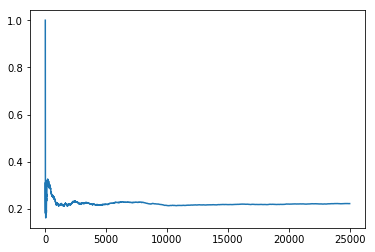

In [13]:
# Plot the acceptance rate
plt.plot(np.cumsum(trace_accepts)/np.arange(1, len(trace_accepts)+1))

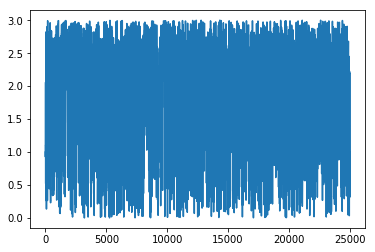

In [14]:
# plot the value sample theta1 from the posterior
plt.plot(trace[:,2])

(array([1012., 1433., 1553., 1901., 2435., 2733., 3094., 3544., 3309.,
        3987.]),
 array([1.17082962e-03, 3.01024266e-01, 6.00877703e-01, 9.00731140e-01,
        1.20058458e+00, 1.50043801e+00, 1.80029145e+00, 2.10014489e+00,
        2.39999832e+00, 2.69985176e+00, 2.99970520e+00]),
 <a list of 10 Patch objects>)

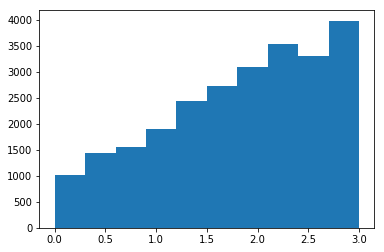

In [15]:
# Plot the histogram of theta1
plt.hist(trace[:,2])